In [7]:
#importing of necessary libraries

import pandas as pd  
import numpy as np  
import seaborn as sns 
import pyreadstat 
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [8]:
# Path to your SPSS file
file_path = "C:\\Users\\1221\\Desktop\\Internship\\Internship\\data\\EmONC Master Dataset_Final.sav"

# Read the SPSS file
df = pd.read_spss(file_path)

# Display the first few rows of the dataframe
df.head(4)

,Q001,qday,qmonth,qyear,qinterviewer,Q003,HF_Name,Q005,Q005_NAME,Q006,...,ambulance_4w_any,anycom,transport_motor_any,mwh,HR_BEmONC_Ready,HR_CEmONC_Ready,DES_BEmONC_Ready,DES_CEmONC_Ready,Readiness_BEmONC,Readiness_CEmONC
0,2.0,26.0,April,2016.0,11.0,Alation Hospital,Alation Hospital,snnp,SNNPR,77.0,...,Yes,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN
1,1001.0,31.0,August,2016.0,3.0,Abiadi Health center,Abiadi Health Center,Tigray,TIGRAY,1.0,...,Yes,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN
2,1002.0,31.0,August,2016.0,3.0,Abi-adi general hospital Gene,Abi-Adi General Hospital,Tigray,TIGRAY,1.0,...,Yes,Yes,Yes,No,1.0,1.0,1.0,NaN,1.0,NaN
3,1003.0,31.0,August,2016.0,4.0,Adi ahferom Health center,Adi Ahferom Health Center,Tigray,TIGRAY,1.0,...,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Read the SPSS file
df, meta = pyreadstat.read_sav(file_path)

# Extract variable names and corresponding labels (metadata)
variable_info = meta.column_names_to_labels

# Print all column names and labels
print("All variable names and labels:")

for col, label in variable_info.items():
    print(f'{col}: {label}')

All variable names and labels:
Q001: Facility number
qday: Date- Day
qmonth: Date- Month
qyear: Date- Year
qinterviewer: Interviewer number
Q003: Name of facility
HF_Name: Facility name - clean format
Q005: Region/Province
Q005_NAME: Region name
Q006: Zone/Sub-city
Q006_NAME: Zone/Sub-city  name
Q006_1: Sub-district
Q006_1_NAME: Sub-district name
ETH_01: Woreda
ETH_02: Town
ETH_03: Kebele
Q007: Type of facility
Q007O: If other, specify
FT2: Facility type in two categories
FT7: faclity type in 7 categories, sorted by hospitals/MCH speciality centres, then h
Q008: Managing authority
Q008O: If other, specify
MA3: Managing authority into three categories
Q010: Facility operational status
Q011: Waypoint name
Q009: Urban/rural
altitude: None
latitude: None
longitude: None
XY_Source: None
Q015: Consent
Q016_A: Hour beginning
Q016_B: Minutes beginning
Q101_1: Deliveries attended in the last 12 months?
Q102A1_1: Which month was the last delivery
Q102B1_1: Which year was the last delivery
Q102A2

In [10]:
# List of columns to select
columns_to_select = [
    "Q001", "qday", "qmonth", "qyear", "qinterviewer", "Q003", "HF_Name", "Q005", "Q005_NAME", "Q006", "Q006_NAME", 
    "Q006_1", "Q006_1_NAME", "ETH_01", "ETH_02", "ETH_03", "Q007", "Q007O", "FT2", "FT7", "Q008", "Q008O", "MA3", 
    "Q010", "Q011", "Q009", "altitude", "latitude", "longitude", "XY_Source", "Q015", "Q016_A", "Q016_B", "Q101_1", 
    "Q102A1_1", "Q102B1_1", "Q102A2_1", "Q102B2_1", "Q106_1", "Q107_1", "Q201_1", "Q202A_1", "Q202B_1", "Q202C_1", 
    "Q203_1", "Q205_1", "Q206A_1", "Q206B_1", "Q206C_1", "Q206D_1", "Q206DO_1", "Q207_1", "Q208_1", "Q204_1", 
    "Q209_1", "Q210_1", "Q210O_1", "Q211_1", "Q212_1", "Q213A_1", "Q213B_1", "Q214_1", "Q215_1", "Q215O_1", 
    "Q216_1", "Q216O_1", "Q217_1", "Q218_1", "Q219_1", "Q220_1", "Q221A_1", "Q221B_1", "Q221C_1", "Q222A_1", 
    "Q222B_1", "Q222C_1", "Q223A_1", "Q223B_1", "Q223C_1", "Q224A_1", "Q224B_1", "Q224C_1", "Q225A_1", "Q225B_1", 
    "Q225C_1", "Q226A_1", "Q226B_1", "Q226C_1", "Q227A_1", "Q227B_1", "Q227C_1", "Q228A_1", "Q228B_1", "Q228C_1", 
    "Q229A_1", "Q229B_1", "Q229C_1", "Q230A_1", "Q230B_1", "Q230C_1", "Q231A_1", "Q231B_1", "Q231C_1", "Q232A_1", 
    "Q232B_1", "Q232C_1", "Q233AA_1", "Q233AB_1", "Q233AC_1", "Q233BA_1", "Q233BB_1", "Q233BC_1", "Q234A_1", 
    "Q234B_1", "Q234C_1", "Q235A_1", "Q235B_1", "Q235C_1", "Q236A_1", "Q236B_1", "Q236C_1", "Q301_1_01", "Q301_1_02", 
    "Q301_1_03", "Q301_1_04", "Q301_1_05", "Q301_1_06", "Q301_1_07", "Q301_1_08", "Q301_1_09", "Q301_1_10", 
    "Q301_1_11", "Q301_1_12", "Q301_1_13", "Q301_1_14", "Q301_1_15", "Q401_1", "Q402_1", "Q403_1", "Q404_1", 
    "Q405_1", "Q406_1", "Q407A_1", "Q407B_1", "Q407C_1", "Q407D_1", "Q407E_1", "Q407F_1", "Q407G_1", "Q407H_1", 
    "Q407I_1", "Q407J_1", "Q407K_1", "Q407L_1", "Q407M_1", "Q408A_1", "Q408B_1", "Q408C_1", "Q408D_1", "Q409_1", 
    "Q410_1", "Q501_1", "Q502_1", "Q503_1", "Q504_1", "Q505_1", "Q506_1", "Q507_1", "Q508_1", "Q509A_1", "Q509B_1", 
    "Q510A_1", "Q510B_1", "Q511_1", "Q512_1", "Q513_1", "Q514_1", "Q515_1", "Q516_1", "Q516O_1", "Q601_1", "Q602_1", 
    "Q603_1", "Q603O_1", "Q604A_1", "Q604B_1", "Q604C_1", "Q604D_1", "Q605_1", "Q606_1", "Q607_1"
]

# Select these columns from the dataframe
df = df[columns_to_select]

# Display the selected dataframe
df.head(4)

,Q001,qday,qmonth,qyear,qinterviewer,Q003,HF_Name,Q005,Q005_NAME,Q006,...,Q602_1,Q603_1,Q603O_1,Q604A_1,Q604B_1,Q604C_1,Q604D_1,Q605_1,Q606_1,Q607_1
0,2.0,26.0,4.0,2016.0,11.0,Alation Hospital,Alation Hospital,7.0,SNNPR,77.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1001.0,31.0,8.0,2016.0,3.0,Abiadi Health center,Abiadi Health Center,1.0,TIGRAY,1.0,...,1.0,1.0,,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1002.0,31.0,8.0,2016.0,3.0,Abi-adi general hospital Gene,Abi-Adi General Hospital,1.0,TIGRAY,1.0,...,1.0,1.0,,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1003.0,31.0,8.0,2016.0,4.0,Adi ahferom Health center,Adi Ahferom Health Center,1.0,TIGRAY,1.0,...,1.0,1.0,,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [11]:
# Rename columns with variable names 
df.columns = [variable_info.get(col, col) for col in df.columns]

df

,Facility number,Date- Day,Date- Month,Date- Year,Interviewer number,Name of facility,Facility name - clean format,Region/Province,Region name,Zone/Sub-city,...,Compile any report containing MNH services?,Frequency these reports compiled?,Other specify,Routinely calculate the indicator institutional delivery?,Calculate institutional cesarean rate ?,Calculate institutional stillbirth rate ?,calculate institutional low birth weight rate ?,have a designated data manager responsible for service data including MNCH?,Does this facility have a computer?,Does the facility have internet access ?
0,2.0,26.0,4.0,2016.0,11.0,Alation Hospital,Alation Hospital,7.0,SNNPR,77.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1001.0,31.0,8.0,2016.0,3.0,Abiadi Health center,Abiadi Health Center,1.0,TIGRAY,1.0,...,1.0,1.0,,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1002.0,31.0,8.0,2016.0,3.0,Abi-adi general hospital Gene,Abi-Adi General Hospital,1.0,TIGRAY,1.0,...,1.0,1.0,,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1003.0,31.0,8.0,2016.0,4.0,Adi ahferom Health center,Adi Ahferom Health Center,1.0,TIGRAY,1.0,...,1.0,1.0,,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1004.0,21.0,9.0,2016.0,4.0,Adi hadem Health center,Adi Hadem Health Center,1.0,TIGRAY,1.0,...,1.0,1.0,,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,8834.0,16.0,5.0,2016.0,51.0,Adama General Hospital and Med,Adama General Hospital And Med,4.0,OROMIYA,26.0,...,1.0,1.0,,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3800,8837.0,16.0,5.0,2016.0,57.0,St Fransicco Health Center,St Fransicco Health Center,4.0,OROMIYA,32.0,...,1.0,1.0,,1.0,0.0,0.0,1.0,1.0,1.0,0.0
3801,8839.0,7.0,10.0,2016.0,21.0,Woreda 12 ealth center,Woreda 12 Ealth Center,14.0,ADDIS ABABA,103.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3802,8841.0,16.0,5.0,2016.0,46.0,FGAE Adama model Clinic,FGAE Adama Model Clinic,4.0,OROMIYA,26.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Columns: 191 entries, Facility number to Does the facility have internet access ?
dtypes: float64(174), object(17)
memory usage: 5.5+ MB


Doubling of dataframe

In [13]:
#doubling of dataframe
df = pd.concat([df, df], ignore_index=True)

# Check the result
print(df.shape)  # This should show (7608, 191)


(7608, 191)


In [14]:
df

,Facility number,Date- Day,Date- Month,Date- Year,Interviewer number,Name of facility,Facility name - clean format,Region/Province,Region name,Zone/Sub-city,...,Compile any report containing MNH services?,Frequency these reports compiled?,Other specify,Routinely calculate the indicator institutional delivery?,Calculate institutional cesarean rate ?,Calculate institutional stillbirth rate ?,calculate institutional low birth weight rate ?,have a designated data manager responsible for service data including MNCH?,Does this facility have a computer?,Does the facility have internet access ?
0,2.0,26.0,4.0,2016.0,11.0,Alation Hospital,Alation Hospital,7.0,SNNPR,77.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1001.0,31.0,8.0,2016.0,3.0,Abiadi Health center,Abiadi Health Center,1.0,TIGRAY,1.0,...,1.0,1.0,,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1002.0,31.0,8.0,2016.0,3.0,Abi-adi general hospital Gene,Abi-Adi General Hospital,1.0,TIGRAY,1.0,...,1.0,1.0,,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1003.0,31.0,8.0,2016.0,4.0,Adi ahferom Health center,Adi Ahferom Health Center,1.0,TIGRAY,1.0,...,1.0,1.0,,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1004.0,21.0,9.0,2016.0,4.0,Adi hadem Health center,Adi Hadem Health Center,1.0,TIGRAY,1.0,...,1.0,1.0,,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,8834.0,16.0,5.0,2016.0,51.0,Adama General Hospital and Med,Adama General Hospital And Med,4.0,OROMIYA,26.0,...,1.0,1.0,,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7604,8837.0,16.0,5.0,2016.0,57.0,St Fransicco Health Center,St Fransicco Health Center,4.0,OROMIYA,32.0,...,1.0,1.0,,1.0,0.0,0.0,1.0,1.0,1.0,0.0
7605,8839.0,7.0,10.0,2016.0,21.0,Woreda 12 ealth center,Woreda 12 Ealth Center,14.0,ADDIS ABABA,103.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7606,8841.0,16.0,5.0,2016.0,46.0,FGAE Adama model Clinic,FGAE Adama Model Clinic,4.0,OROMIYA,26.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,1.0,1.0


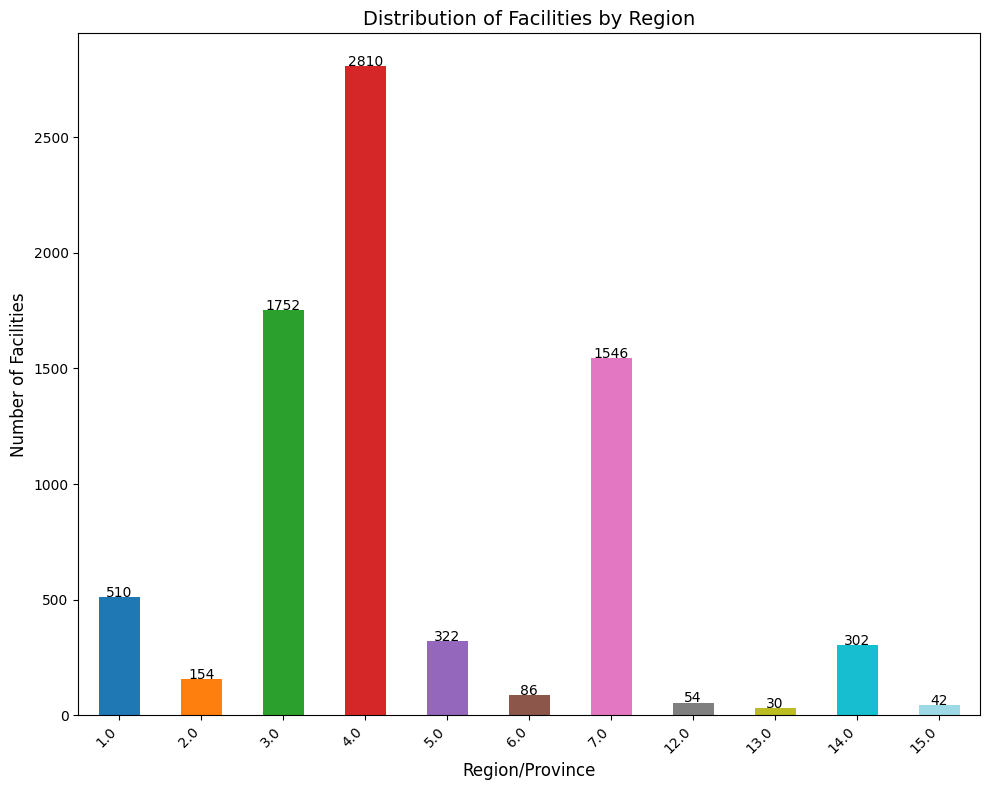

In [15]:
# Group by 'Region/Province' and count occurrences of 'Facility number'
region_facility_count = df.groupby('Region/Province')['Facility number'].count()

# Define a color map to give each bar a different color
colors = plt.cm.get_cmap('tab20', len(region_facility_count))

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
bars = region_facility_count.plot(kind='bar', ax=ax, color=[colors(i) for i in range(len(region_facility_count))])

# Add count labels at the top of each bar
for i, count in enumerate(region_facility_count):
    ax.text(i, count + 0.5, str(count), ha='center', fontsize=10)

# Customize the plot
ax.set_title('Distribution of Facilities by Region', fontsize=14)
ax.set_xlabel('Region/Province', fontsize=12)
ax.set_ylabel('Number of Facilities', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
df.to_csv("../data/Identification data.csv")